#### there are two methods
1) most frequent value(MODE)
2) random value(entering value like "MISSING")

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
pd.set_option('mode.chained_assignment', None)

In [3]:
df = pd.read_csv("day37.csv")

In [8]:
df = df[["GarageQual","FireplaceQu","SalePrice"]]

In [9]:
df.head()

,GarageQual,FireplaceQu,SalePrice
0,TA,NaN,208500
1,TA,TA,181500
2,TA,TA,223500
3,TA,Gd,140000
4,TA,TA,250000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   GarageQual   1379 non-null   object
 1   FireplaceQu  770 non-null    object
 2   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


In [14]:
df.isnull().mean()*100

GarageQual      5.547945
FireplaceQu    47.260274
SalePrice       0.000000
dtype: float64

In [19]:
df.GarageQual.value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

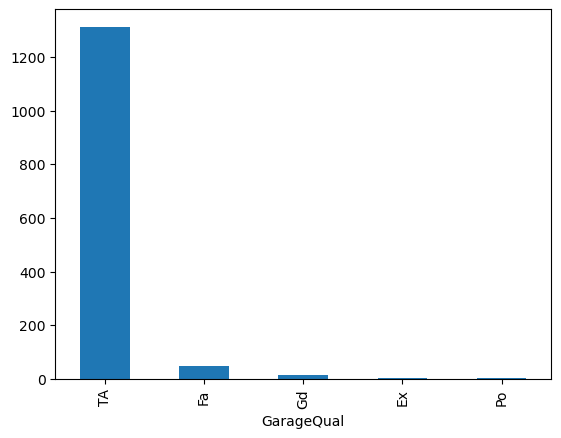

In [18]:
df.GarageQual.value_counts().plot.bar();

#### First using most frequent value

#### One thing when implementing this is that one value should be really really more compared to other in that case there will be no impact on the distribution and other things

#### but if there are two values which are almost same and then we go for MODE then the distribution won't be the same and also result won't be good after applying this

In [20]:
df.GarageQual.mode()

0    TA
Name: GarageQual, dtype: object

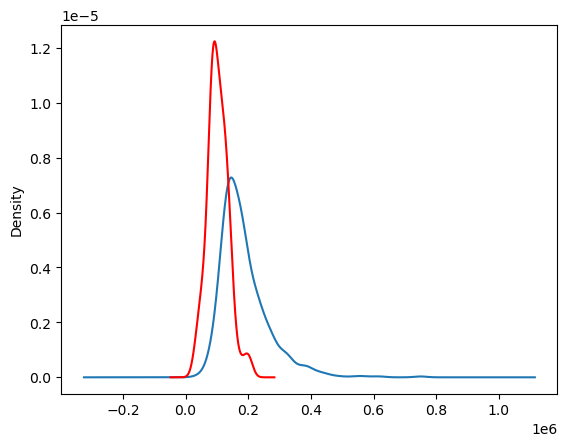

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df.GarageQual == "TA"].SalePrice.plot(kind='kde',ax=ax)

df[df.GarageQual.isnull()].SalePrice.plot(kind='kde',ax=ax, color='red');

In [49]:
df[df.FireplaceQu.isnull()]

,GarageQual,FireplaceQu,SalePrice
0,TA,NaN,208500
5,TA,NaN,143000
10,TA,NaN,129500
12,TA,NaN,144000
15,TA,NaN,132000
...,...,...,...
1452,TA,NaN,145000
1453,TA,NaN,84500
1454,TA,NaN,185000
1458,TA,NaN,142125


In [26]:
# now filling missing values with MODE

In [27]:
temp = df[df.GarageQual == "TA"].SalePrice

In [35]:
df.loc[:,"GarageQual"].fillna('TA', inplace=True)

In [36]:
df.isnull().sum()

GarageQual       0
FireplaceQu    690
SalePrice        0
dtype: int64

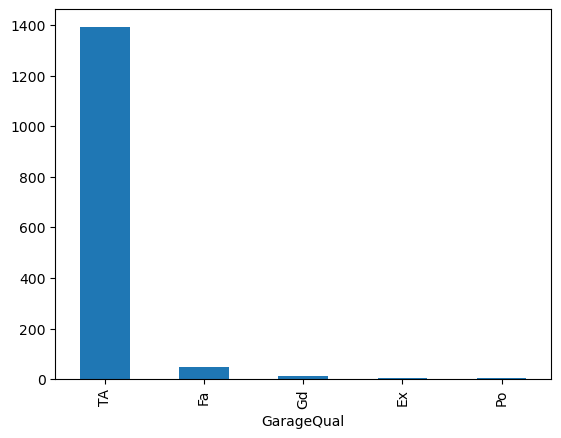

In [40]:
df.GarageQual.value_counts().plot(kind='bar');

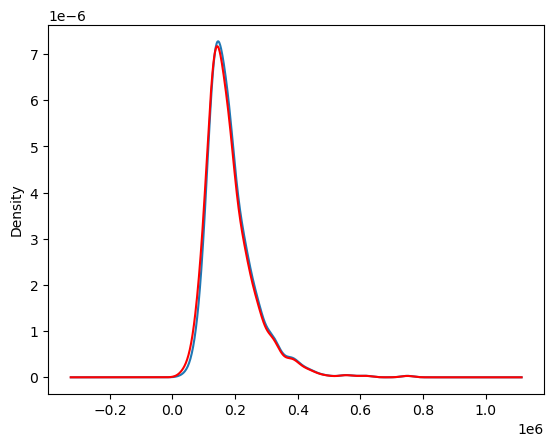

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)

df[df.GarageQual == "TA"].SalePrice.plot(kind='kde',ax=ax,color='red');

##### now doing it for FireplaceQu column
in this column, 2 values have almost same value count

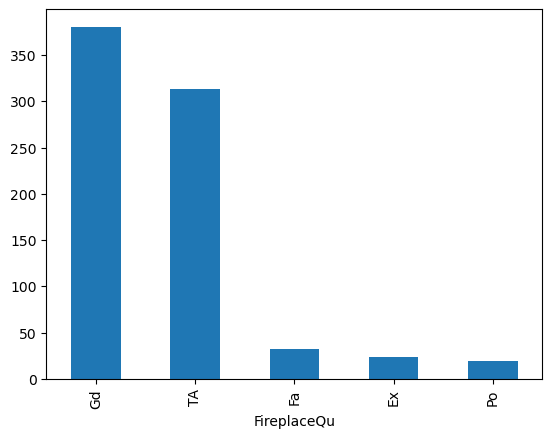

In [53]:
df.FireplaceQu.value_counts().plot(kind='bar');

In [54]:
df.FireplaceQu.mode()

0    Gd
Name: FireplaceQu, dtype: object

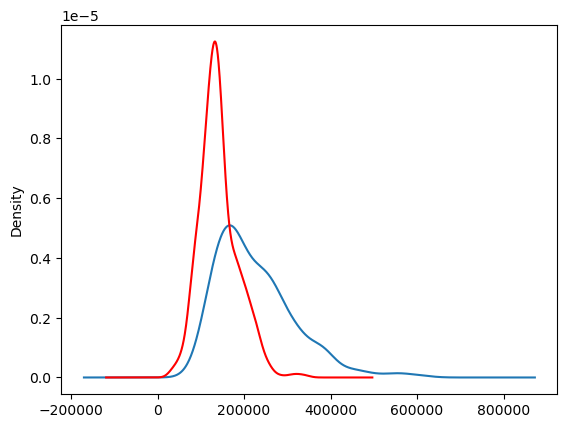

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df.FireplaceQu == 'Gd'].SalePrice.plot(kind='kde',ax=ax)

df[df.FireplaceQu.isnull()].SalePrice.plot(kind='kde',ax=ax,color='red');

In [60]:
temp2 = df[df.FireplaceQu == 'Gd']

In [61]:
df.FireplaceQu.fillna('Gd',inplace=True)

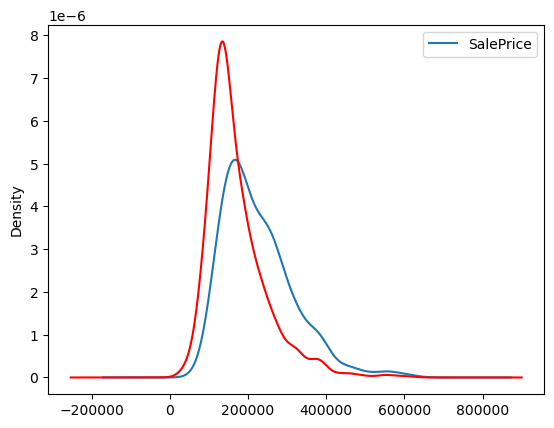

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp2.plot(kind='kde',ax=ax)

df[df.FireplaceQu=='Gd'].SalePrice.plot(kind='kde',ax=ax,color='red');

#### doing the exact same thing using Sklearn

In [66]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice',axis=1),df['SalePrice'],test_size=.3,random_state=42)

In [71]:
from sklearn.impute import SimpleImputer

In [72]:
imputer = SimpleImputer(strategy='most_frequent')

In [73]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [74]:
imputer.statistics_

array(['TA', 'Gd'], dtype=object)